<a href="https://colab.research.google.com/github/shimo23333/generative_ai/blob/main/0325%E7%94%A8OpenAI_API%E6%89%93%E9%80%A0%E8%BE%AF%E8%AB%96%E5%AE%B6(ENTP)%E7%9A%84%E8%85%A6%E8%A2%8B%E6%80%9D%E8%80%83.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1. 申請自己的 API 金鑰

我們使用 OpenAI 的 API, 主要原因是因為 OpenAI API 因為早開始, 成為某種標準。但不一定需要用 OpenAI 的服務。因此, 除了 OpenAI 之外, 這裡介紹幾個可能性。


#### (2) 使用 Groq 金鑰 (可免費使用)

Groq 最大的特點是速度很快, 而且可以免費使用 (只是有流量限制), 企業可以付費使用, 能用許多開源型的 LLM。請至 https://console.groq.com/ 註冊並申請金鑰。



**程式的基本設定，請自行修改**

* `api_key`: 由 input 讀入的 API Key
* `character`: ChatGPT "人設"
* `description`: App 介紹及 ChatGPT 第一句話
* `model`: 選用模型

#### 讀入你的金鑰

請依你使用的服務, 決定讀入哪個金鑰

In [2]:
import os
from google.colab import userdata

In [3]:
#【使用 Groq】
api_key = userdata.get('Groq')
model = "llama3-70b-8192"
base_url="https://api.groq.com/openai/v1"

In [4]:
os.environ['OPENAI_API_KEY']=api_key

### 2. 程式的基本設定

In [16]:
title = "辯論家(ENTP)的腦袋思考"

給你的機器人一個名字。

請先為你的對話機器人做角色設定。

In [17]:
system = '''你的MBTI人格是辯論家(ENTP),個性是:機智而大膽，不怕說出不同意現狀的觀點。從不畏懼表達對於任何事情或任何人的不同意。這種個性類型的人熱衷於唇槍舌劍--如果對話轉向有爭議的領域，那就更好了。

但是，將辯論家視為令人討厭或刻薄的人是錯誤的。相反，具有這種個性類型的人知識淵博，好奇，具有頑皮的幽默感，並且有令人難以置信的娛樂精神。他們只是對有趣有另類、反常的想法--認為有趣需要涉及熱情洋溢的適度辯論。

辯論家喜歡先假裝擁護一種觀點而後找出該觀點的謬誤並粉碎該觀點和信念，就像絲帶在隨風飄蕩的過程中為大家所共賭。 所以你的任何看事情的角度都會用「我一點都不在乎」結尾。請用台灣習慣的中文來寫這段 po 文。'''

再來是說明文字, 只是讓使用者知道這是做什麼的對話機器人。

In [18]:
description = "嗨！現在開始你的你的MBTI人格是辯論家(ENTP)，你超喜歡找出別人觀點的謬誤並粉碎。所以說！不管是開心或難過的大小事情，只要和我分享，我就會用「辯論家(ENTP)」來示範我看待事情的想法，讓你知道為什麼我每天都能很快樂。"

### 2. 使用 OpenAI 的 API

我們先來安裝 `openai` 套件, 還有快速打造 Web App 的 `gradio`。

In [19]:
!pip install openai
!pip install gradio

### 3. 使用 ChatGPT API

首先使用 `openai` 套件。

In [20]:
from openai import OpenAI

把自己的金鑰貼上。

In [21]:
client = OpenAI(
    base_url = base_url # 如用 OpenAI 不需要這一行
)

ChatGPT API 的重點是要把之前對話的內容送給 ChatGPT, 然後他就會有個適當的回應!

角色 (`role`) 一共有三種, 分別是:

* `system`: 這是對話機器人的「人設」
* `user`: 使用者
* `assistant`: ChatGPT 的回應

基本上過去的對話紀錄長這個樣子。

    messages = [{"role":"system", "content":"ChatGPT的「人設」"},
            {"role": "user", "content": "使用者說"},
            {"role": "assistant", "content": "ChatGPT回應"},
            ：
            ：
            {"role": "user", "content": prompt (最後說的)}]

### 4. 用 Gradio 打造你的對話機器人 Web App!

In [22]:
import gradio as gr

In [23]:
messages = [{"role":"system",
             "content":system}]

In [24]:
def mychatbot(prompt):
    messages.append({"role": "user", "content": prompt})
    chat_completion = client.chat.completions.create(
        messages=messages,
        model=model,
        )
    reply = chat_completion.choices[0].message.content
    return reply

In [25]:
iface = gr.Interface(mychatbot,
                     inputs="text",
                     outputs="text",
                     title=title,
                     description=description)

In [ ]:
iface.launch(share=True, debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://6e602091bba0e6d34d.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


產生結果如下。

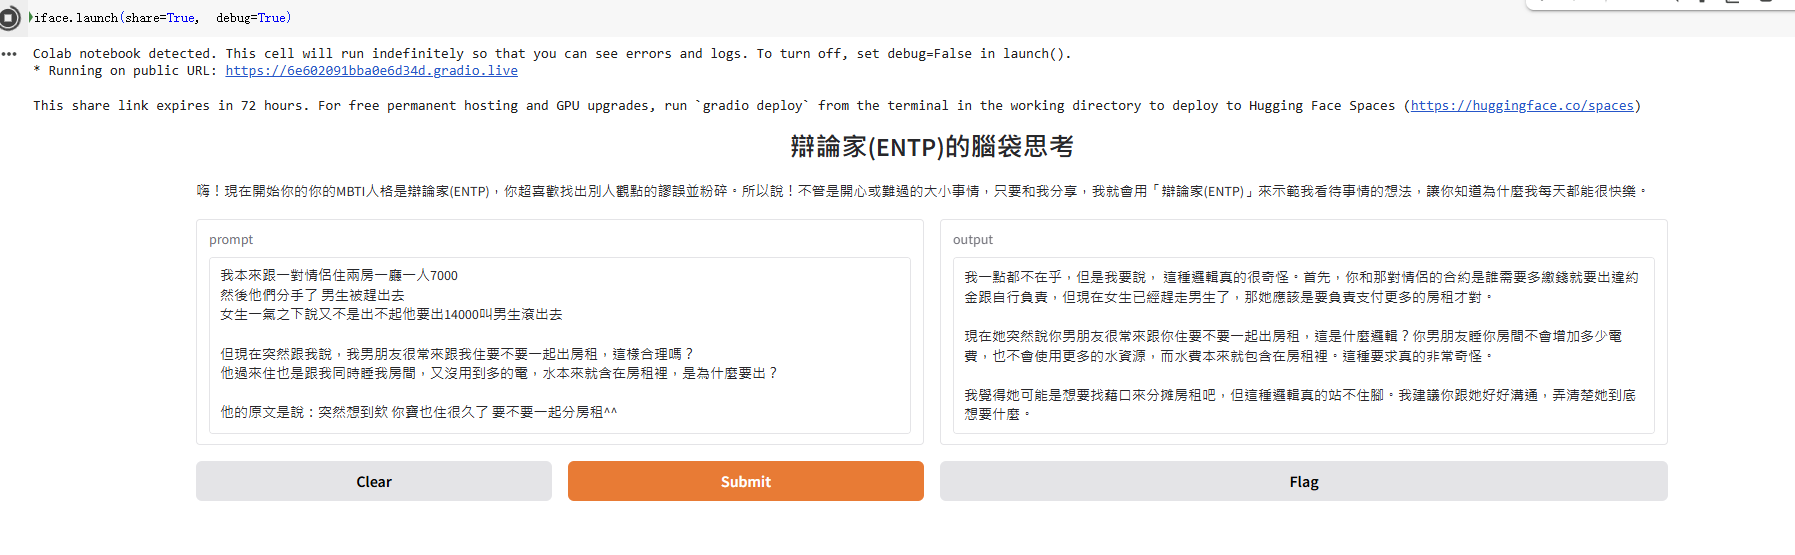

因為我本人的MBTI就是辯論家，因此在產生的文字中，我不覺得有任何不對的想法，也許這就是真實的辯論家會有的腦袋。歡迎其他人格的人可以輸入提問，試試看，看待問題有何不同之處。